In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTPond8.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,Unnamed: 0,Date,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen (mg/L),PH,Ammonia (mg/L),Nitrate (mg/L),Total_length (cm),Weight (g),Unnamed: 11
0,2021-06-18T13:06:49+01:00,18-06-2021,1,25.0000,95,14.697,8.34286,0.02520,0,6.821429,2.869286,`
1,2021-06-18T13:07:10+01:00,18-06-2021,2,24.8750,16,13.440,8.34286,0.00002,3114,6.821429,2.869286,NaN
2,2021-06-18T13:07:52+01:00,18-06-2021,3,24.6875,-2,13.600,8.36101,0.00042,2454,6.821429,2.869286,NaN
3,2021-06-18T13:08:12+01:00,18-06-2021,4,24.6875,-2,13.872,8.37463,0.01150,1745,6.821429,2.869286,NaN
4,2021-06-18T13:08:31+01:00,18-06-2021,5,24.6875,-1,14.209,8.36101,0.03008,1459,6.821429,2.869286,NaN


No data for the population in this pond .


In [4]:
df_raw1.drop("entry_id",axis=1,inplace=True)

In [5]:
df_raw1.drop("Date",axis=1,inplace=True)

In [6]:
df_raw1.drop("Unnamed: 11",axis=1,inplace=True)

In [7]:
df_raw1.columns=['created_at', 'Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
        'Fish_Length', 'Fish_Weight']

In [8]:
df_raw1.head(5)

,created_at,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight
0,2021-06-18T13:06:49+01:00,25.0000,95,14.697,8.34286,0.02520,0,6.821429,2.869286
1,2021-06-18T13:07:10+01:00,24.8750,16,13.440,8.34286,0.00002,3114,6.821429,2.869286
2,2021-06-18T13:07:52+01:00,24.6875,-2,13.600,8.36101,0.00042,2454,6.821429,2.869286
3,2021-06-18T13:08:12+01:00,24.6875,-2,13.872,8.37463,0.01150,1745,6.821429,2.869286
4,2021-06-18T13:08:31+01:00,24.6875,-1,14.209,8.36101,0.03008,1459,6.821429,2.869286


In [9]:
df_raw1.dtypes

created_at           object
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

Fixing the Date and time 

In [10]:
df_raw1['created_at']=df_raw1['created_at'].apply(lambda x : x[:-6].replace("T"," "))

In [11]:
df_raw1.head(5)

,created_at,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight
0,2021-06-18 13:06:49,25.0000,95,14.697,8.34286,0.02520,0,6.821429,2.869286
1,2021-06-18 13:07:10,24.8750,16,13.440,8.34286,0.00002,3114,6.821429,2.869286
2,2021-06-18 13:07:52,24.6875,-2,13.600,8.36101,0.00042,2454,6.821429,2.869286
3,2021-06-18 13:08:12,24.6875,-2,13.872,8.37463,0.01150,1745,6.821429,2.869286
4,2021-06-18 13:08:31,24.6875,-1,14.209,8.36101,0.03008,1459,6.821429,2.869286


<AxesSubplot:>

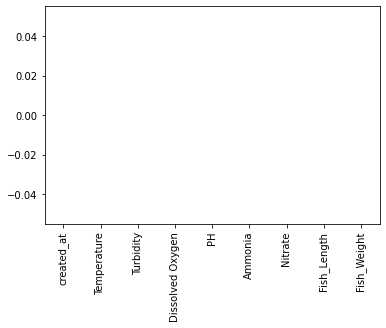

In [12]:
df_raw1.isna().sum().plot.bar()

No missing records

In [13]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

In [14]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [15]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [16]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time
0,25.0000,95,14.697,8.34286,0.02520,0,6.821429,2.869286,2021-06-18 13:06:49,2021-06-18,13:06:49
1,24.8750,16,13.440,8.34286,0.00002,3114,6.821429,2.869286,2021-06-18 13:07:10,2021-06-18,13:07:10
2,24.6875,-2,13.600,8.36101,0.00042,2454,6.821429,2.869286,2021-06-18 13:07:52,2021-06-18,13:07:52
3,24.6875,-2,13.872,8.37463,0.01150,1745,6.821429,2.869286,2021-06-18 13:08:12,2021-06-18,13:08:12
4,24.6875,-1,14.209,8.36101,0.03008,1459,6.821429,2.869286,2021-06-18 13:08:31,2021-06-18,13:08:31


Sort DataFrame by Date (Datetime)

In [17]:
df=df_raw1.sort_values(by='Datetime') 

In [18]:
# df_raw1 = df_raw1.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

In [19]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime
count,70744.0000,70744.0000,70744.0000,70744.0000,70744.0000,70744.0000,70744.0000,70744.0000,70744
mean,24.9227,-0.7821,9.6272,3.5555,0.1252,667.1538,21.9624,144.0460,2021-08-13 09:28:09.033557760
min,-127.0000,-56.0000,0.0000,-3.1374,0.0000,0.0000,6.8214,2.8693,2021-06-18 13:06:49
25%,24.4375,-51.0000,0.0000,-2.0707,0.0011,303.0000,16.8743,50.5286,2021-07-26 06:43:57
50%,24.8750,22.0000,9.3140,7.4758,0.0011,363.0000,18.0429,61.1143,2021-08-01 16:02:35.500000
75%,25.3750,34.0000,15.6700,7.6029,0.0031,975.0000,32.0857,300.2000,2021-09-17 18:27:14
max,30.5000,100.0000,42.2610,16.2308,0.9966,3338.0000,51.3571,841.2000,2021-12-06 11:35:02
std,1.4714,41.5894,9.3629,4.9999,0.2219,448.3547,8.7521,123.3290,NaN


We have 70744 records in total. Start date- 18th of June,'21 and end date- 6th of Dec,'21

In [20]:
d=df["Date"].unique()
print(len(d))
d

56


array([datetime.date(2021, 6, 18), datetime.date(2021, 6, 20),
       datetime.date(2021, 6, 21), datetime.date(2021, 6, 22),
       datetime.date(2021, 6, 23), datetime.date(2021, 6, 24),
       datetime.date(2021, 6, 25), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 7, 1),
       datetime.date(2021, 7, 2), datetime.date(2021, 7, 3),
       datetime.date(2021, 7, 4), datetime.date(2021, 7, 20),
       datetime.date(2021, 7, 21), datetime.date(2021, 7, 22),
       datetime.date(2021, 7, 23), datetime.date(2021, 7, 24),
       datetime.date(2021, 7, 25), datetime.date(2021, 7, 26),
       datetime.date(2021, 7, 27), datetime.date(2021, 7, 28),
       datetime.date(2021, 7, 29), datetime.date(2021, 7, 30),
       datetime.date(2021, 7, 31), datetime.date(2021, 8, 1),
       datetime.date(2021, 8, 2), datetime.date(2021, 8, 3),
       datetime.date(2021, 8, 4), datetime.date(2021, 8, 22),
       datetime.date(2021, 8, 27), datetime.date(2021, 8, 28),


In [21]:
a=df["Fish_Weight"].unique()
print(len(a))
a

57


array([  2.86928571,   3.71571429,   4.49142857,   3.081428  ,
         5.26714286,   6.04285714,   6.81857143,   8.37      ,
         9.92142857,  10.69714286,  12.24857143,  13.02428571,
        13.8       ,  15.25714286,  39.64285714,  41.45714286,
        43.27142857,  45.08571429,  46.9       ,  48.71428571,
        50.52857143,  52.34285714,  54.15714286,  55.97142857,
        57.78571429,  59.6       ,  61.11428571,  62.62857143,
        64.14285714,  65.65714286, 132.4571429 , 164.7428571 ,
       171.2       , 179.6857143 , 188.1714286 , 196.6571429 ,
       205.1428571 , 222.1142857 , 230.6       , 239.0857143 ,
       296.8       , 298.5       , 300.2       , 301.9       ,
       303.6       , 305.3       , 307.        , 308.7       ,
       310.4       , 312.1       , 327.6857143 , 355.4571429 ,
       364.7142857 , 398.6571429 , 758.0571429 , 825.9714286 ,
       841.2       ])

So we can see there are 56 unique dates but 57 unique fish weights. This means on a certain date, there are 2 unique readings of fish weights.

In [22]:
date_group=df.groupby("Date", sort = False)

In [24]:
for i in range(len(date_group)):
    print(i,'--------> ',d[i],'-----------> ',date_group.get_group(d[i])["Fish_Weight"].unique())
    

0 -------->  2021-06-18 ----------->  [2.86928571]
1 -------->  2021-06-20 ----------->  [3.71571429]
2 -------->  2021-06-21 ----------->  [4.49142857 3.081428  ]
3 -------->  2021-06-22 ----------->  [5.26714286]
4 -------->  2021-06-23 ----------->  [6.04285714]
5 -------->  2021-06-24 ----------->  [6.81857143]
6 -------->  2021-06-25 ----------->  [8.37]
7 -------->  2021-06-28 ----------->  [9.92142857]
8 -------->  2021-06-29 ----------->  [10.69714286]
9 -------->  2021-07-01 ----------->  [12.24857143]
10 -------->  2021-07-02 ----------->  [13.02428571]
11 -------->  2021-07-03 ----------->  [13.8]
12 -------->  2021-07-04 ----------->  [15.25714286]
13 -------->  2021-07-20 ----------->  [39.64285714]
14 -------->  2021-07-21 ----------->  [41.45714286]
15 -------->  2021-07-22 ----------->  [43.27142857]
16 -------->  2021-07-23 ----------->  [45.08571429]
17 -------->  2021-07-24 ----------->  [46.9]
18 -------->  2021-07-25 ----------->  [48.71428571]
19 -------->  2021-0

In [25]:
#Fixing the weight 
df.loc[df["Date"] == d[2], "Fish_Weight"] = 4.49142857

In [26]:
df.to_csv('Pond8.csv')

We do not have reading for an equal interval in a particular day . Also , we have missing dates where there was no reading taken between start date and end date.

In [27]:
df= pd.read_csv("Pond8.csv", delimiter = ",",low_memory=False )

In [28]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [29]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time
0,25.0000,95,14.697,8.34286,0.02520,0,6.821429,2.869286,2021-06-18 13:06:49,2021-06-18,13:06:49
1,24.8750,16,13.440,8.34286,0.00002,3114,6.821429,2.869286,2021-06-18 13:07:10,2021-06-18,13:07:10
2,24.6875,-2,13.600,8.36101,0.00042,2454,6.821429,2.869286,2021-06-18 13:07:52,2021-06-18,13:07:52
3,24.6875,-2,13.872,8.37463,0.01150,1745,6.821429,2.869286,2021-06-18 13:08:12,2021-06-18,13:08:12
4,24.6875,-1,14.209,8.36101,0.03008,1459,6.821429,2.869286,2021-06-18 13:08:31,2021-06-18,13:08:31


In [30]:

df['Datetime'] = pd.to_datetime(df.Datetime,infer_datetime_format=True)
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time
df['Date_diff'] = df['Date'].diff()
# df['diff'] = df['diff'].fillna(0)



In [31]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,25.0000,95,14.697,8.34286,0.02520,0,6.821429,2.869286,2021-06-18 13:06:49,2021-06-18,13:06:49,NaT
1,24.8750,16,13.440,8.34286,0.00002,3114,6.821429,2.869286,2021-06-18 13:07:10,2021-06-18,13:07:10,0 days
2,24.6875,-2,13.600,8.36101,0.00042,2454,6.821429,2.869286,2021-06-18 13:07:52,2021-06-18,13:07:52,0 days
3,24.6875,-2,13.872,8.37463,0.01150,1745,6.821429,2.869286,2021-06-18 13:08:12,2021-06-18,13:08:12,0 days
4,24.6875,-1,14.209,8.36101,0.03008,1459,6.821429,2.869286,2021-06-18 13:08:31,2021-06-18,13:08:31,0 days


In [32]:
df['Date_diff']=df['Date_diff'].astype('timedelta64[D]')

In [33]:
df['Date_diff'] = df['Date_diff'].fillna(0)

In [34]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,25.0000,95,14.697,8.34286,0.02520,0,6.821429,2.869286,2021-06-18 13:06:49,2021-06-18,13:06:49,0.0
1,24.8750,16,13.440,8.34286,0.00002,3114,6.821429,2.869286,2021-06-18 13:07:10,2021-06-18,13:07:10,0.0
2,24.6875,-2,13.600,8.36101,0.00042,2454,6.821429,2.869286,2021-06-18 13:07:52,2021-06-18,13:07:52,0.0
3,24.6875,-2,13.872,8.37463,0.01150,1745,6.821429,2.869286,2021-06-18 13:08:12,2021-06-18,13:08:12,0.0
4,24.6875,-1,14.209,8.36101,0.03008,1459,6.821429,2.869286,2021-06-18 13:08:31,2021-06-18,13:08:31,0.0


In [35]:
df['Date_diff'].unique()

array([ 0.,  2.,  1.,  3., 16., 18.,  5., 10.,  4.,  6., 34.])

In [36]:
p=df[df['Date_diff']>=2]
p       

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
249,25.3125,34,10.6680,8.27930,0.00089,334,7.208571,3.715714,2021-06-20 05:08:11,2021-06-20,05:08:11,2.0
9367,25.0625,15,33.9770,8.05687,0.54197,1945,9.837143,9.921429,2021-06-28 12:56:39,2021-06-28,12:56:39,3.0
9895,25.4375,31,0.0000,7.90707,0.00117,345,10.822857,12.248571,2021-07-01 22:51:00,2021-07-01,22:51:00,2.0
10700,24.2500,10,7.0990,7.68009,0.55059,243,15.811429,39.642857,2021-07-20 11:09:46,2021-07-20,11:09:46,16.0
40161,-127.0000,95,0.0000,7.83898,0.00108,0,24.874286,132.457143,2021-08-22 22:41:05,2021-08-22,22:41:05,18.0
40166,25.6250,-12,0.0000,6.73589,0.00106,2270,26.845714,164.742857,2021-08-27 13:56:11,2021-08-27,13:56:11,5.0
45727,24.6875,-51,7.4290,-3.13745,0.00109,1574,29.228571,222.114286,2021-09-03 15:57:15,2021-09-03,15:57:15,2.0
47557,25.4375,-51,40.0480,-3.13745,0.00109,998,32.017143,296.800000,2021-09-15 14:01:25,2021-09-15,14:01:25,10.0
70620,24.3125,-51,1.8840,-3.13745,0.49283,1161,32.848571,327.685714,2021-09-28 10:15:16,2021-09-28,10:15:16,4.0
70681,30.5000,-51,9.5040,15.45166,0.53983,2059,33.825714,355.457143,2021-10-04 12:32:09,2021-10-04,12:32:09,6.0


In [37]:
df['Weight_diff'] = df['Fish_Weight'].diff()
df['Weight_diff'] = df['Weight_diff'].fillna(0)

In [38]:
df['Weight_diff'].unique()

array([  0.        ,   0.84642857,   0.77571428,   0.77571429,
         0.77571429,   1.55142857,   1.55142857,   0.77571429,
         1.55142857,   0.77571428,   0.77571429,   1.45714286,
        24.38571428,   1.81428572,   1.81428571,   1.51428571,
         1.51428572,   1.51428571,   1.51428572,  66.80000004,
        32.2857142 ,   6.4571429 ,   8.4857143 ,   8.4857143 ,
         8.4857142 ,  16.9714286 ,  57.7142857 ,   1.7       ,
         1.7       ,  15.5857143 ,  27.7714286 ,   9.2571428 ,
        33.9428572 , 359.4       ,  67.9142857 ,  15.2285714 ])

In [39]:
date_group=df.groupby("Date", sort = False)

In [40]:
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,
2021-06-18,25.0000,95,14.6970,8.34286,0.02520,0,6.821429,2.869286,2021-06-18 13:06:49,13:06:49,0.0,0.000000
2021-06-20,25.3125,34,10.6680,8.27930,0.00089,334,7.208571,3.715714,2021-06-20 05:08:11,05:08:11,2.0,0.846429
2021-06-21,26.0000,34,4.8960,8.36101,0.53770,315,7.537143,4.491429,2021-06-21 00:00:16,00:00:16,1.0,0.775714
2021-06-22,24.7500,7,18.1040,8.42003,0.50873,400,7.865714,5.267143,2021-06-22 14:02:56,14:02:56,1.0,0.775714
2021-06-23,25.0625,36,10.8290,8.42003,0.49283,306,8.194286,6.042857,2021-06-23 00:32:43,00:32:43,1.0,0.775714
2021-06-24,24.0625,17,4.7830,8.44726,0.55059,304,8.522857,6.818571,2021-06-24 00:00:24,00:00:24,1.0,0.775714
2021-06-25,25.0000,20,4.0120,8.50628,0.00165,326,9.180000,8.370000,2021-06-25 00:00:03,00:00:03,1.0,1.551429
2021-06-28,25.0625,15,33.9770,8.05687,0.54197,1945,9.837143,9.921429,2021-06-28 12:56:39,12:56:39,3.0,1.551429
2021-06-29,24.3750,24,0.0000,8.02963,0.00113,298,10.165714,10.697143,2021-06-29 05:02:42,05:02:42,1.0,0.775714


Shifting the weight difference to the previous day recording since the weight recorded for the current day reflects previous day's water quality.

In [41]:
d=df["Date"].unique()
print(len(d))
d

56


array([datetime.date(2021, 6, 18), datetime.date(2021, 6, 20),
       datetime.date(2021, 6, 21), datetime.date(2021, 6, 22),
       datetime.date(2021, 6, 23), datetime.date(2021, 6, 24),
       datetime.date(2021, 6, 25), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 7, 1),
       datetime.date(2021, 7, 2), datetime.date(2021, 7, 3),
       datetime.date(2021, 7, 4), datetime.date(2021, 7, 20),
       datetime.date(2021, 7, 21), datetime.date(2021, 7, 22),
       datetime.date(2021, 7, 23), datetime.date(2021, 7, 24),
       datetime.date(2021, 7, 25), datetime.date(2021, 7, 26),
       datetime.date(2021, 7, 27), datetime.date(2021, 7, 28),
       datetime.date(2021, 7, 29), datetime.date(2021, 7, 30),
       datetime.date(2021, 7, 31), datetime.date(2021, 8, 1),
       datetime.date(2021, 8, 2), datetime.date(2021, 8, 3),
       datetime.date(2021, 8, 4), datetime.date(2021, 8, 22),
       datetime.date(2021, 8, 27), datetime.date(2021, 8, 28),


In [42]:
a=df["Fish_Weight"].unique()
print(len(a))
a

56


array([  2.86928571,   3.71571429,   4.49142857,   5.26714286,
         6.04285714,   6.81857143,   8.37      ,   9.92142857,
        10.69714286,  12.24857143,  13.02428571,  13.8       ,
        15.25714286,  39.64285714,  41.45714286,  43.27142857,
        45.08571429,  46.9       ,  48.71428571,  50.52857143,
        52.34285714,  54.15714286,  55.97142857,  57.78571429,
        59.6       ,  61.11428571,  62.62857143,  64.14285714,
        65.65714286, 132.4571429 , 164.7428571 , 171.2       ,
       179.6857143 , 188.1714286 , 196.6571429 , 205.1428571 ,
       222.1142857 , 230.6       , 239.0857143 , 296.8       ,
       298.5       , 300.2       , 301.9       , 303.6       ,
       305.3       , 307.        , 308.7       , 310.4       ,
       312.1       , 327.6857143 , 355.4571429 , 364.7142857 ,
       398.6571429 , 758.0571429 , 825.9714286 , 841.2       ])

In [43]:
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],12]=date_group.get_group(d[i+1]).Weight_diff.max()
    print(df[df["Date"]==d[i]].iloc[0,12])
    
    

0.8464285719999998
0.7757142840000002
0.7757142869999996
0.7757142860000004
0.7757142860000004
1.5514285709999989
1.5514285710000006
0.7757142889999997
1.5514285700000006
0.775714279999999
0.7757142900000016
1.4571428599999994
24.385714279999995
1.8142857200000009
1.81428571
1.8142857200000009
1.81428571
1.81428571
1.8142857200000009
1.81428571
1.8142857200000009
1.81428571
1.8142857200000009
1.81428571
1.5142857099999958
1.5142857200000037
1.514285710000003
1.5142857199999895
66.80000004000001
32.2857142
6.45714289999998
8.485714300000012
8.485714300000012
8.485714299999984
8.48571419999999
16.971428600000024
8.485714299999984
8.485714300000012
57.714285700000005
1.6999999999999886
1.6999999999999886
1.6999999999999886
1.7000000000000455
1.6999999999999886
1.6999999999999886
1.6999999999999886
1.6999999999999886
1.7000000000000455
15.58571429999995
27.771428600000036
9.257142799999997
33.94285719999999
359.40000000000003
67.91428569999994
15.228571400000078


In [44]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,
2021-06-18,25.0000,95,14.6970,8.34286,0.02520,0,6.821429,2.869286,2021-06-18 13:06:49,13:06:49,0.0,0.846429
2021-06-20,25.3125,34,10.6680,8.27930,0.00089,334,7.208571,3.715714,2021-06-20 05:08:11,05:08:11,2.0,0.775714
2021-06-21,26.0000,34,4.8960,8.36101,0.53770,315,7.537143,4.491429,2021-06-21 00:00:16,00:00:16,1.0,0.775714
2021-06-22,24.7500,7,18.1040,8.42003,0.50873,400,7.865714,5.267143,2021-06-22 14:02:56,14:02:56,1.0,0.775714
2021-06-23,25.0625,36,10.8290,8.42003,0.49283,306,8.194286,6.042857,2021-06-23 00:32:43,00:32:43,1.0,0.775714
2021-06-24,24.0625,17,4.7830,8.44726,0.55059,304,8.522857,6.818571,2021-06-24 00:00:24,00:00:24,1.0,1.551429
2021-06-25,25.0000,20,4.0120,8.50628,0.00165,326,9.180000,8.370000,2021-06-25 00:00:03,00:00:03,1.0,1.551429
2021-06-28,25.0625,15,33.9770,8.05687,0.54197,1945,9.837143,9.921429,2021-06-28 12:56:39,12:56:39,3.0,0.775714
2021-06-29,24.3750,24,0.0000,8.02963,0.00113,298,10.165714,10.697143,2021-06-29 05:02:42,05:02:42,1.0,1.551429


In [45]:
dates_to_be_dropped=[]
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],11]=date_group.get_group(d[i+1]).Date_diff.max()
    print(d[i],'------' ,df[df["Date"]==d[i]].iloc[0,11])
    if (df[df["Date"]==d[i]].iloc[0,11])>=2:
        dates_to_be_dropped.append(d[i]) 

2021-06-18 ------ 2.0
2021-06-20 ------ 1.0
2021-06-21 ------ 1.0
2021-06-22 ------ 1.0
2021-06-23 ------ 1.0
2021-06-24 ------ 1.0
2021-06-25 ------ 3.0
2021-06-28 ------ 1.0
2021-06-29 ------ 2.0
2021-07-01 ------ 1.0
2021-07-02 ------ 1.0
2021-07-03 ------ 1.0
2021-07-04 ------ 16.0
2021-07-20 ------ 1.0
2021-07-21 ------ 1.0
2021-07-22 ------ 1.0
2021-07-23 ------ 1.0
2021-07-24 ------ 1.0
2021-07-25 ------ 1.0
2021-07-26 ------ 1.0
2021-07-27 ------ 1.0
2021-07-28 ------ 1.0
2021-07-29 ------ 1.0
2021-07-30 ------ 1.0
2021-07-31 ------ 1.0
2021-08-01 ------ 1.0
2021-08-02 ------ 1.0
2021-08-03 ------ 1.0
2021-08-04 ------ 18.0
2021-08-22 ------ 5.0
2021-08-27 ------ 1.0
2021-08-28 ------ 1.0
2021-08-29 ------ 1.0
2021-08-30 ------ 1.0
2021-08-31 ------ 1.0
2021-09-01 ------ 2.0
2021-09-03 ------ 1.0
2021-09-04 ------ 1.0
2021-09-05 ------ 10.0
2021-09-15 ------ 1.0
2021-09-16 ------ 1.0
2021-09-17 ------ 1.0
2021-09-18 ------ 1.0
2021-09-19 ------ 1.0
2021-09-20 ------ 1.0
2021-09

In [46]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,
2021-06-18,25.0000,95,14.6970,8.34286,0.02520,0,6.821429,2.869286,2021-06-18 13:06:49,13:06:49,2.0,0.846429
2021-06-20,25.3125,34,10.6680,8.27930,0.00089,334,7.208571,3.715714,2021-06-20 05:08:11,05:08:11,1.0,0.775714
2021-06-21,26.0000,34,4.8960,8.36101,0.53770,315,7.537143,4.491429,2021-06-21 00:00:16,00:00:16,1.0,0.775714
2021-06-22,24.7500,7,18.1040,8.42003,0.50873,400,7.865714,5.267143,2021-06-22 14:02:56,14:02:56,1.0,0.775714
2021-06-23,25.0625,36,10.8290,8.42003,0.49283,306,8.194286,6.042857,2021-06-23 00:32:43,00:32:43,1.0,0.775714
2021-06-24,24.0625,17,4.7830,8.44726,0.55059,304,8.522857,6.818571,2021-06-24 00:00:24,00:00:24,1.0,1.551429
2021-06-25,25.0000,20,4.0120,8.50628,0.00165,326,9.180000,8.370000,2021-06-25 00:00:03,00:00:03,3.0,1.551429
2021-06-28,25.0625,15,33.9770,8.05687,0.54197,1945,9.837143,9.921429,2021-06-28 12:56:39,12:56:39,1.0,0.775714
2021-06-29,24.3750,24,0.0000,8.02963,0.00113,298,10.165714,10.697143,2021-06-29 05:02:42,05:02:42,2.0,1.551429


In [47]:
dates_to_be_dropped.append(d[len(date_group)-1])  
dates_to_be_dropped

[datetime.date(2021, 6, 18),
 datetime.date(2021, 6, 25),
 datetime.date(2021, 6, 29),
 datetime.date(2021, 7, 4),
 datetime.date(2021, 8, 4),
 datetime.date(2021, 8, 22),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 9, 5),
 datetime.date(2021, 9, 24),
 datetime.date(2021, 9, 28),
 datetime.date(2021, 10, 4),
 datetime.date(2021, 10, 6),
 datetime.date(2021, 10, 12),
 datetime.date(2021, 11, 15),
 datetime.date(2021, 12, 3),
 datetime.date(2021, 12, 6)]

In [48]:
# df.iloc[df.loc[df["Date_diff"]>=2.index[0],12]
# #         print(df.iloc[df.loc[df["Date"]==d[i]].index[0],12])
# #         print(d[i])
# # print(i)
i=0
for i in range(len(dates_to_be_dropped)):
    m=df.loc[df["Date"]==dates_to_be_dropped[i]].index
    df.drop(m,inplace=True)
    df.reset_index()

In [49]:
df.tail(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff,Weight_diff
69382,25.7500,-50,11.333,-1.67574,0.47172,705,32.291429,310.4,2021-09-23 15:48:07,2021-09-23,15:48:07,0.0,0.0
69383,25.8125,-51,11.157,-1.68028,0.47739,705,32.291429,310.4,2021-09-23 15:48:30,2021-09-23,15:48:30,0.0,0.0
69384,25.8125,-38,12.094,-1.65758,0.47361,703,32.291429,310.4,2021-09-23 15:48:53,2021-09-23,15:48:53,0.0,0.0
69385,25.8125,-51,11.670,-1.67120,0.47930,705,32.291429,310.4,2021-09-23 15:49:14,2021-09-23,15:49:14,0.0,0.0
69386,25.8125,-31,9.459,-1.68028,0.46985,704,32.291429,310.4,2021-09-23 15:49:37,2021-09-23,15:49:37,0.0,0.0


In [50]:
df.drop("Date_diff",axis=1,inplace=True)

In [51]:
df.to_csv('cleaned_Pond8.csv')